# INET 4710 Project

Text Analysis of historical interaction data & content from removed facebook pages.

Author:

## 1. Overview

- what is the business problem?
	- (My problem: What is this data?, what is the tendency of data? Answer those question with document clustoring)
- Briefly describe the main objective of the project.
	- to clearfy the problem above
- List models created for project
	- k means,...
- Include relevant references

The data is from Facebook's user comment linked to 2016 US election investigation from following facebook pages.

- being_patriotic
- blacktivist
- lgbt_united
- secured_borders
- united_muslims_of_america

Resource URL

- Project page: <https://data.world/d1gi/missing-fb-posts-w-share-stats?utm_campaign=dataquest&utm_source=blog&utm_content=180122>

**Download data needs to log in data.world**

Data vizualization example: <https://public.tableau.com/profile/d1gi#!/vizhome/FB4/TotalReachbyPage>

----

## 2. Exploratory Data Analysis

In this section, I show following topics.

- numerical summary about all the data
- data structure of each dataframe
- effective data amount
- basic statistics about each columns of data
- word cloud to understand topic

In [2]:
# Loading data
from os import path
import pandas as pd

data_path = '/Users/reiven/Documents/Python/CSCI4710/Project/Data'
binary_path = '/Users/reiven/Documents/Python/CSCI4710/Project/binary_file'

blacktivist_data = pd.read_csv(path.join(data_path, 'blacktivist.csv'))
being_patriotic_data = pd.read_csv(path.join(data_path, 'being_patriotic.csv'))
# heart_of_texas_data = pd.read_csv(path.join(data_path, 'heart_of_texas.csv'))
lgbt_united_data = pd.read_csv(path.join(data_path, 'lgbt_united.csv'))
secured_borders_data = pd.read_csv(path.join(data_path, 'secured_borders.csv'))
united_muslims_of_america_data = pd.read_csv(path.join(data_path, 'united_muslims_of_america.csv'))
summary_stats = pd.read_csv(path.join(data_path, 'fb_removed_list_stats.csv'))


In [3]:

def show_basic_info(data, title):
    """
    Function to show exploratory data analysis 
    that shows following tooic.
    
    - shape(# of rows and columns)
    - data set column names and it's basic summary(not NA, unique, mean and so on)
    :param data: panda's dataframe
    :param title: string
    :return: 
    """
    sep = "\n" + "-" * 10 + "\n"
    print("Data:", title)
    print("Shape(row, column):", data.shape, sep)
    # print("Column name and it's data type")
    # print(data.info(), sep)
    # print("Count of efficient(Not NA) data")
    # print(data.count(), sep)
    print("columns summary")
    print(data.describe(include='all'), sep)
    print("Show first 5 data")
    print(data.head(5))


### 2.1. Short summary of all the data

In [5]:
summary_stats

,source,page_url,page_status,total_shares,interactions,number_of_posts,word_count
0,Blacktivists,Facebook.com/Blacktivists,removed,103767792,6182835,500+,15349.0
1,Heart of Texas,Facebook.com/Txrebels,removed,102950151,3453143,500+,NaN
2,United Muslims of America,Facebook.Com/MuslimAmerica,removed,71355895,2128875,500+,6892.0
3,Being Patriotic,Facebook.Com/Patriototus,removed,51139860,4438745,500+,53782.0
4,Secured Borders,Facebook.Com/Secured.Borders,removed,5600136,1592771,500+,53850.0
5,LGBT United,Facebook.Com/Lgtbun,removed,5187494,1262386,500+,15020.0


The result above shows that the there are 6 resources from facebook page, and all the page is removed. 

The top 2 pages(Blacktivists and Heart of Texas) has huge total shares compared to other topics, 
but the word count(it related to the amount of comment) is not so obviously huge.
I assume people have much interesting to these 2 topics or the pages were created much older than the other pages.

But, heart of texas data does not have actual comment text, so I omit in this project.

### 2.2 Basic statistics and preparation for each page data

In this section, I show each page's data and it's basic summary and format data properly.

First, I clearfy data structure to take Blacktivist data for example, and define what data to format.
After that, seeing each page's summary information and do same data preparation.

#### 2.2.1 Basic statistics about Blactivist page

In [6]:
show_basic_info(blacktivist_data, "Blactivist")

Data: Blactivist
Shape(row, column): (500, 10) 
----------

columns summary
                         page_url       source     followers        date  \
count                         500          500  5.000000e+02         500   
unique                          1            4           NaN         319   
top     Facebook.com/Blacktivists  Blacktivist           NaN  2016-07-22   
freq                          500          496           NaN           6   
mean                          NaN          NaN  2.075356e+05         NaN   
std                           NaN          NaN  3.478560e+05         NaN   
min                           NaN          NaN  0.000000e+00         NaN   
25%                           NaN          NaN  9.218100e+04         NaN   
50%                           NaN          NaN  1.714990e+05         NaN   
75%                           NaN          NaN  2.678510e+05         NaN   
max                           NaN          NaN  6.605641e+06         NaN   

           

The result above shows that there are 500 columns of data and 2 data lost post_message items.

As the columns summary shows that page_url has only one type of item, most of the soruce and post_tye column also have same value and few outlier value is value which means not-recorded. To see first 5 items of data, both columns just shows the resouce place of the data and it is almost always from same resource.

And the date, time, time_zone columns is to specify when the data were posted by the user.

Also, post_link seems unique identifier of each post, it is not necessary data to analyse.


From the result above, I format all the data with following opearation.

1. removing data row which countain NA value.
2. removing page_url, source and post_link, post_type column from all the dataset.
3. combine date, time, time_zone to datetime object and omit date, time, and time_zone column.


In [4]:
from datetime import datetime
import pytz as tz


def format_data(df, page_label):
    """
    function to clean dataframes.
    this function drop rows which contains NA, 
    and drop page_url, source, post_link column
    instead of dropping page_url and source, I add page_label text.
    
    also create datetime column and remove date, time, time_zone
    :param df: 
    :param page_label:  
    :return df: 
    """
    past_shape = df.shape
    df = df.dropna(axis=0, how='any')
    df = df.drop(['page_url', 'source', 'post_link', 'post_type'], axis=1)
    df['page_label'] = page_label
    df = df.reset_index()  # reset index for datetime append operation
    
    datetime_list = list()
    for i in range(df.shape[0]):
        # need correct numerical index for code below.
        dt_str = '%s %s %s' % (df['date'][i], df['time'][i], df['time_zone'][i])
        dt_str = dt_str.strip()  # need strip to remove last blank character.
        try:
            dt_parsed = datetime.strptime(dt_str, '%Y-%m-%d %H:%M:%S %Z%z')
            CT = tz.timezone('America/Chicago')
            dt_parsed = dt_parsed.astimezone(CT)
        except ValueError as e:
            print(e)
            print('error happen :%s;' % dt_str)
            dt_parsed = None
        datetime_list.append(dt_parsed)

    df['datetime'] = datetime_list
    df = df.drop(['index', 'date', 'time', 'time_zone'], axis=1)
    df['datetime'] = pd.to_datetime(df['datetime'])

    show = True
    if show:
        print('result shape compare: ', past_shape, df.shape)
    return df


In [5]:

# format all data with format_data()
blacktivist = format_data(blacktivist_data, 'blacktivist')
being_patriotic = format_data(being_patriotic_data, 'being_patriotic')
lgbt_united = format_data(lgbt_united_data, 'lgbt_united')
secured_borders = format_data(secured_borders_data, 'secured_borders')
united_muslims_of_america = format_data(united_muslims_of_america_data, 'united_muslims')


result shape compare:  (500, 10) (498, 5)
result shape compare:  (500, 10) (496, 5)
result shape compare:  (500, 10) (500, 5)
result shape compare:  (500, 10) (500, 5)
result shape compare:  (500, 10) (500, 5)


In [7]:
# show important columns(latest, oldest, most interaction)

def show_important_columns(df):
    """
    show important the oldest, latest, and most interaction data.
    
    :param df: 
    :return: 
    """
    latest_column = df.sort_values('datetime').iloc[-1]
    oldest_column = df.sort_values('datetime').iloc[0]
    highest_interaction_column = df.sort_values('interactions').iloc[-1]
    print("show important columns\n")
    print('# latest data')
    print(latest_column, end='\n\n')
    print('# oldest data')
    print(oldest_column, end='\n\n')
    print('# highest interaction data')
    print(highest_interaction_column, end='\n\n')


In [8]:

# show blacktivist important data with show_important_columns
show_important_columns(blacktivist)

show important columns

# latest data
followers                                           389601
interactions                                          5162
post_message    DON'T PRETEND THAT AGGRESSION HAS NO COLOR
page_label                                     blacktivist
datetime                         2017-08-26 06:00:00-05:00
Name: 295, dtype: object

# oldest data
followers                                                       0
interactions                                                 3524
post_message    ISIS is no worse than the KKK. American societ...
page_label                                            blacktivist
datetime                                2015-11-26 07:18:31-06:00
Name: 437, dtype: object

# highest interaction data
followers                                                  107180
interactions                                               344309
post_message    A 14-year-old Royce Mann brought hundreds of p...
page_label                                    

In [9]:
# define function to show user_post count plot
import matplotlib.pyplot as plt
from datetime import timedelta
from copy import copy
import seaborn as sns

sns.set_style("white")


def show_time_plot(df, title):
    """
    show plot to see the increasing of comment.
    each bar is weekly count of user comment.
    line plot is cumsum count.
    
    :param df: 
    :param title: 
    :return: 
    """
    # TODO: fix plot better
    label_list = []
    week_count_dict = {}
    sort_by_dt = df.sort_values('datetime')
    oldest = sort_by_dt.iloc[0]['datetime']
    latest = sort_by_dt.iloc[-1]['datetime']
    
    delta = timedelta(days=7)
    while oldest < latest:
        label = str(oldest.to_pydatetime()).split(' ')[0]
        label_list.append(label)
        temp = df[(df['datetime'] >= oldest) & (df['datetime'] < (oldest + delta))]
        oldest = oldest + delta
        week_count_dict[label] = temp.shape[0]
    data = list()
    cumsum_data = list()
    for label in label_list:
        data.append(week_count_dict[label])
    for i in range(len(label_list)):
        if i == 0:
            cumsum_data.append(week_count_dict[label_list[i]])
        else:
            cumsum_data.append(cumsum_data[i - 1] + week_count_dict[label_list[i]]) 
    label_list_show = copy(label_list)
    max_index = data.index(max(data))
    for i in range(len(label_list_show)):
        if i not in [0, max_index, len(label_list_show) - 1]:
            label_list_show[i] = ''
    
    plt.title('comment amount of %s' % title)
    plt.bar(label_list, data, width=1.0,color='blue', label='comment per week')
    plt.plot(label_list, cumsum_data,color='green', label='cumsum comment')
    plt.xticks(label_list, label_list_show)
    plt.xlabel('Date')
    plt.ylabel('comment amount')
    plt.legend()
    plt.show()

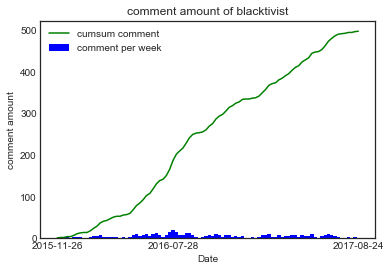

In [12]:

# show blacktivist's user comment situation with show_time_plot()
show_time_plot(blacktivist, 'blacktivist')


Word cloud of blacktivist page

In [10]:
# define function to show wordcloud of the post_message
"""
wordcloud is from 
<http://amueller.github.io/word_cloud/index.html>
"""
# wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wc(df):
    text = ','.join(df['post_message'])

    # Generate a word cloud image
    wordcloud = WordCloud(background_color="white", max_words=1000).generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    


In [14]:
plot_wc(blacktivist)

The word cloud above shows that main keyword in blacktivist page seems "black", "cop", "police", "officer".

I don't know about the political situation in the US so much. 
I heard some news about bad attitude of police officer for black people.
I assume these things are tipical example related to that page. 
That might be the reason why those keywords appears.

#### 2.2.2 Basic statistics about Being patriotic page

In this section, I show statistical summary and some important column(oldest, latest, most shared) and user comment count plot and word cloud plot with formatted being_patriotic data as we describe above. 

I use same functions I define section 2.2.1.

In [15]:
show_basic_info(being_patriotic, "being patriotic")

Data: being patriotic
Shape(row, column): (496, 5) 
----------

columns summary
            followers   interactions  \
count      496.000000     496.000000   
unique            NaN            NaN   
top               NaN            NaN   
freq              NaN            NaN   
mean    102779.743952    8955.649194   
std      80702.346175   32547.147743   
min          0.000000    3927.000000   
25%          0.000000    5453.000000   
50%     128831.000000    6336.500000   
75%     182657.000000    8237.500000   
max     219727.000000  724323.000000   

                                             post_message       page_label  \
count                                                 496              496   
unique                                                436                1   
top     To all whom our flag offends there is the one ...  being_patriotic   
freq                                                    4              496   
mean                                             

In [16]:
show_important_columns(being_patriotic)

show important columns

# latest data
followers                          219727
interactions                         6684
post_message          Ain't it the truth?
page_label                being_patriotic
datetime        2017-08-15 20:22:00-05:00
Name: 213, dtype: object

# oldest data
followers                                                       0
interactions                                                39740
post_message    A living, breathing page of American history! ...
page_label                                        being_patriotic
datetime                                2015-08-08 12:15:26-05:00
Name: 2, dtype: object

# highest interaction data
followers                                                  145109
interactions                                               724323
post_message    At least 50,000 homeless veterans are starving...
page_label                                        being_patriotic
datetime                                2016-09-08 14:30:00-05:00
N

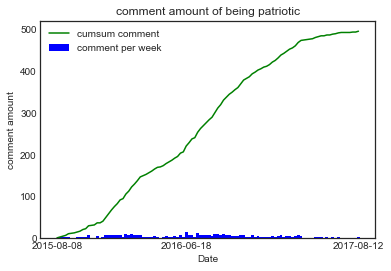

In [17]:
show_time_plot(being_patriotic, 'being patriotic')

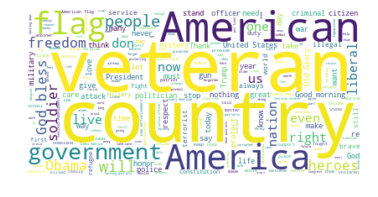

In [18]:
plot_wc(being_patriotic)

#### 2.2.3 Basic statistics about LGBT united page

In this section, I show basic information about lgbt_united page data samely above.


In [19]:
show_basic_info(lgbt_united, "lgbt united")

Data: lgbt united
Shape(row, column): (500, 5) 
----------

columns summary
            followers  interactions  \
count      500.000000    500.000000   
unique            NaN           NaN   
top               NaN           NaN   
freq              NaN           NaN   
mean     10374.988000   2524.772000   
std      36750.688255   4958.490841   
min          0.000000    921.000000   
25%          0.000000   1458.000000   
50%          0.000000   1752.500000   
75%          0.000000   2239.500000   
max     142874.000000  82298.000000   

                                             post_message   page_label  \
count                                                 500          500   
unique                                                423            1   
top     It really doesn't matter! You know who you are...  lgbt_united   
freq                                                    3          500   
mean                                                  NaN          NaN   
std        

In [20]:
show_important_columns(lgbt_united)

show important columns

# latest data
followers                                                  142874
interactions                                                 1178
post_message    Fun double standard. Hm, scratch that. It's no...
page_label                                            lgbt_united
datetime                                2017-08-24 15:59:47-05:00
Name: 473, dtype: object

# oldest data
followers                                                       0
interactions                                                 1162
post_message    #queerquote #NeilPatrickHarris #family #LGBTyo...
page_label                                            lgbt_united
datetime                                2015-07-12 18:35:01-05:00
Name: 476, dtype: object

# highest interaction data
followers                                                       0
interactions                                                82298
post_message    It really doesn't matter! You know who you are...
page_label 

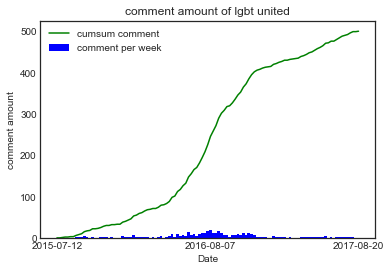

In [22]:
show_time_plot(lgbt_united, 'lgbt united')

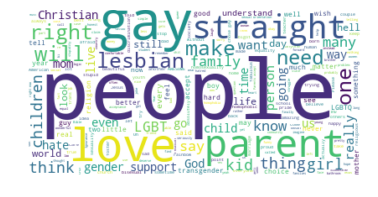

In [23]:
plot_wc(lgbt_united)

#### 2.2.4 Basic statistics about Secured Borders page

In [24]:
show_basic_info(secured_borders, "secured borders")

Data: secured borders
Shape(row, column): (500, 5) 
----------

columns summary
            followers  interactions  \
count      500.000000     500.00000   
unique            NaN           NaN   
top               NaN           NaN   
freq              NaN           NaN   
mean     11200.272000    3185.54200   
std      45480.374095    5027.32195   
min          0.000000    1103.00000   
25%          0.000000    1779.75000   
50%          0.000000    2464.00000   
75%          0.000000    3524.25000   
max     546007.000000  100707.00000   

                                             post_message       page_label  \
count                                                 500              500   
unique                                                491                1   
top     Until political whores like Pelosi or Ryan are...  secured_borders   
freq                                                    2              500   
mean                                                  NaN    

In [25]:
show_important_columns(secured_borders)

show important columns

# latest data
followers                                                  135784
interactions                                                 2320
post_message     It’s utterly despicable that mosques were all...
page_label                                        secured_borders
datetime                                2017-08-20 13:00:00-05:00
Name: 274, dtype: object

# oldest data
followers                                                       0
interactions                                                 3319
post_message    What a disgrace! Our liberal government is for...
page_label                                        secured_borders
datetime                                2016-09-12 09:01:12-05:00
Name: 142, dtype: object

# highest interaction data
followers                                                       0
interactions                                               100707
post_message    As I've said before, I'm really concerned if v...
page_label 

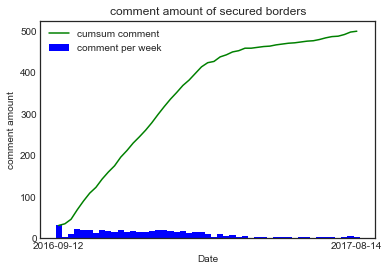

In [26]:
show_time_plot(secured_borders, 'secured borders')

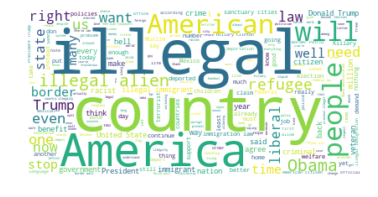

In [27]:
plot_wc(secured_borders)

#### 2.2.5 Basic statistics about United Muslims of America page

In [28]:
show_basic_info(united_muslims_of_america, "united muslims of america")

Data: united muslims of america
Shape(row, column): (500, 5) 
----------

columns summary
            followers   interactions  \
count      500.000000     500.000000   
unique            NaN            NaN   
top               NaN            NaN   
freq              NaN            NaN   
mean    142711.790000    4257.750000   
std     136249.685866   10378.618766   
min          0.000000    1303.000000   
25%          0.000000    2215.000000   
50%     207571.000000    2672.000000   
75%     268736.000000    3499.500000   
max     329520.000000  150246.000000   

                                             post_message      page_label  \
count                                                 500             500   
unique                                                406               1   
top     Alcohol and pork is against Christian beliefs ...  united_muslims   
freq                                                    8             500   
mean                                        

In [29]:
show_important_columns(united_muslims_of_america)

show important columns

# latest data
followers                                                  329520
interactions                                                 2797
post_message    If a woman is free to show her body, why shoul...
page_label                                         united_muslims
datetime                                2017-08-23 11:54:00-05:00
Name: 224, dtype: object

# oldest data
followers                                                       0
interactions                                                 4351
post_message    Hillary Clinton Slams Donald Trump’s Anti-Musl...
page_label                                         united_muslims
datetime                                2016-01-26 09:14:23-06:00
Name: 76, dtype: object

# highest interaction data
followers                                                       0
interactions                                               150246
post_message    New York city Muslim Harassment Social Experim...
page_label  

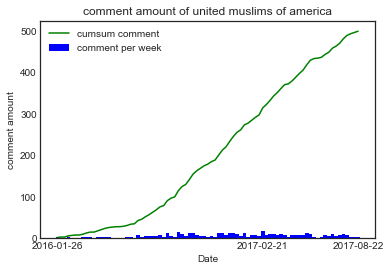

In [30]:
show_time_plot(united_muslims_of_america, 'united muslims of america')

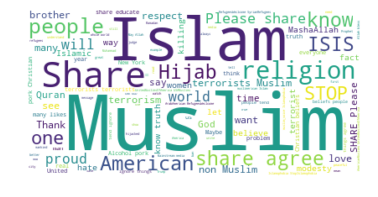

In [31]:
plot_wc(united_muslims_of_america)

#### 2.2.6 All data

In this section, conbining all data and show some information like oldest, latest, and most shared user comment, user comment amount plot, wordcloud.

(2494, 5)
show important columns

# latest data
followers                                           389601
interactions                                          5162
post_message    DON'T PRETEND THAT AGGRESSION HAS NO COLOR
page_label                                     blacktivist
datetime                         2017-08-26 06:00:00-05:00
Name: 295, dtype: object

# oldest data
followers                                                       0
interactions                                                 1162
post_message    #queerquote #NeilPatrickHarris #family #LGBTyo...
page_label                                            lgbt_united
datetime                                2015-07-12 18:35:01-05:00
Name: 476, dtype: object

# highest interaction data
followers                                                  145109
interactions                                               724323
post_message    At least 50,000 homeless veterans are starving...
page_label                          

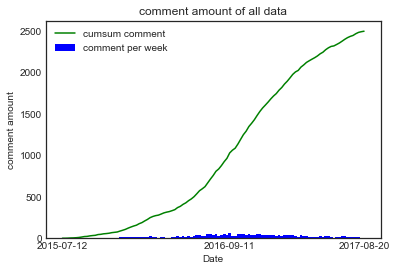

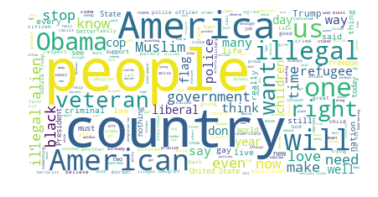

In [11]:
"""
wordcloud is from 
<http://amueller.github.io/word_cloud/index.html>
"""
# wordcloud
from wordcloud import WordCloud

all_data = pd.concat([blacktivist, being_patriotic, lgbt_united, secured_borders, united_muslims_of_america])
all_data.reset_index()  # reset index
print(all_data.shape)
show_important_columns(all_data)
show_time_plot(all_data, 'all data')
plot_wc(all_data)

----

## 3. Data formatting

In this section, I use all_data's user_comment, and format post_message text data to generate tfidf matrix.

In [12]:
# save blob
import pickle
from os.path import exists


def save_object(path, fit):
    if exists(path):
        with open(path, 'rb') as f:
            return pickle.load(f)
    else:
        obj = fit()
        with open(path, 'wb') as f:
            pickle.dump(obj, f)
            f.close()
        return obj

In [13]:
# make term document matrix
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer_path = "/Users/reiven/Documents/Python/CSCI4710/Project/binary_file/tfidf_vectorizer.pkl"

def tfidf_vec_run():
    vectorizer = TfidfVectorizer(
        use_idf=True,
        analyzer='word',
        stop_words='english',
        lowercase=True
    )
    vectorizer.fit(all_data['post_message'])
    return vectorizer

vectorizer = save_object(tfidf_vectorizer_path, tfidf_vec_run)

matrix = vectorizer.transform(all_data['post_message'])

#### 3.1. showing PCA decomposition

In this section, doing PCA and find first n principle components that explain more than 90% of the data.

In [14]:
# PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


matrix_array = matrix.toarray()
size = matrix_array.shape

pca_result_path = "/Users/reiven/Documents/Python/CSCI4710/Project/binary_file/pca_result.pkl"


n_component_list = [x*100 for x in range(int(size[0]/100))]


def pca_run():
    n_component_explanation_rate_list = list()
    for n_component in n_component_list:
        pca = PCA(n_components=n_component)
        # pca = KernelPCA(n_components=2,  kernel='rbf', gamma=1.0)
        pca.fit_transform(matrix_array)
        n_component_explanation_rate_list.append(sum(pca.explained_variance_ratio_))
    return n_component_explanation_rate_list

n_component_explanation_rate_list = save_object(pca_result_path, pca_run)

print('PCA explanation rate')
print('component:\t cumsum explanation rate')
for n_component, rate in zip(n_component_list, n_component_explanation_rate_list):
    print("%d:\t %0.3f" % (n_component, rate))


PCA explanation rate
component:	 cumsum explanation rate
0:	 0.000
100:	 0.280
200:	 0.409
300:	 0.498
400:	 0.571
500:	 0.631
600:	 0.682
700:	 0.727
800:	 0.766
900:	 0.801
1000:	 0.833
1100:	 0.861
1200:	 0.887
1300:	 0.910
1400:	 0.929
1500:	 0.947
1600:	 0.962
1700:	 0.974
1800:	 0.984
1900:	 0.992
2000:	 0.997
2100:	 1.000
2200:	 1.000
2300:	 1.000


----

## Model

- k Means clustoring(&detect center)
- Gaussian Mixture
- DBSCAN?

All above might be meaningless because it is too difficult to evaluate, so I try to change problem like regression the interaction from user comment text and date and follower count.
But, in this meantime, I put those model, and if I have time, I try to find evaluation method for those clustoring model like silhouette score.


<http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html>

In [15]:
print(all_data.columns)

Index(['followers', 'interactions', 'post_message', 'page_label', 'datetime'], dtype='object')


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

y = all_data['interactions'].as_matrix()

# feature idea
# TODO: pca decomp
# TODO: combine datetime(timestamp) columns
X = matrix.toarray()  # tfidf matrix
x_follower_vec = all_data['followers'].as_matrix()  # if doing normalize, need to check histrgram
dt_vec = list()
for dt in all_data['datetime']:
    dt_vec.append(dt.timestamp())
dt_vec = np.array(dt_vec)

print("tfidf X shape",X.shape)
tfidf_end = X.shape[1]
print(x_follower_vec.shape)
X = np.append(X, x_follower_vec.reshape(len(x_follower_vec),1), axis=1)
X = np.append(X, dt_vec.reshape(len(dt_vec), 1), axis=1)
print("after adding followers, datetime timestamp",X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_tfidf_train = X_train[:, 0:tfidf_end]
X_tfidf_test =X_test[:, 0:tfidf_end]
print(X_tfidf_train.shape)

tfidf X shape (2494, 8712)
(2494,)


after adding followers, datetime timestamp (2494, 8714)
(1995, 8714)
(499, 8714)
(1995,)
(499,)
(1995, 8712)


In [24]:
from sklearn.linear_model import LinearRegression


ln_tfidf = LinearRegression()
ln_tfidf.fit(X_tfidf_train, y_train)

ln = LinearRegression()
ln.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
from sklearn.metrics import mean_squared_error
# ln.score calculates R^2 score

y_pred = ln.predict(X_test)
y_tfidf_pred = ln_tfidf.predict(X_tfidf_test)

print('Calculate with tfidf, followers, datetime timestamp data')
print('train R^2 score',ln.score(X_train, y_train))
print('test R^2 score', mean_squared_error(y_test, y_pred), end='\n\n')

print('Calculate with tfidf only data')
print('train R^2 score',ln_tfidf.score(X_tfidf_train, y_train))
print('test R^2 score', mean_squared_error(y_test, y_tfidf_pred), end='\n\n')


Calculate with tfidf, followers, datetime timestamp data
train R^2 score 0.718331987433
test R^2 score 7.7836834665e+14

Calculate with tfidf only data
train R^2 score 0.59399681458
test R^2 score 8.61984000925e+34



I assume the result above shows somewhat relation between comment data and amount of interaction due to train R^2 score.
But, some meaningless weight might decay the prediction, and that causes bad test R^2 score.

So, I try standarization from next task with Lasso.

I also compare 2 train data, one is post_message text's tfidf matrix, the other is tfidf and follower amount and timestamp data.

The reason I add those 2 additional columns are due to following 2 assumption.

- More followers leads to more interaction
- Older post have more time to get interaction

The result seems later dataset is better prediction.